In [159]:
#%%加载库
import numpy as np
import seaborn as sbn
import  matplotlib.pyplot as plt
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname=u'C:\Windows\Fonts\simsun.ttc',size=16)
%matplotlib inline

In [160]:
# %%
def f(x):
    return  0.5 * x

In [161]:
#%% 生成数据
x = np.linspace(-2 * np.pi, 2 * np.pi,50)
## 未排序数据
#x = np.random.rand(50) * 4 * np.pi - 2 * np.pi
x = x + 0.05 * np.random.standard_normal(len(x))
y= f(x) + 0.25* np.random.standard_normal(len(x))

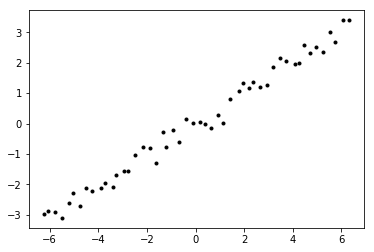

In [162]:
# 观察数据    
plt.plot(x,y,'k.',label='rawdata')

LinearRegression均方误差= -1.06581410364e-16
LinearRegression的score= 0.983714196731
x的奇异值 [ 26.17269168]
x的轶 1


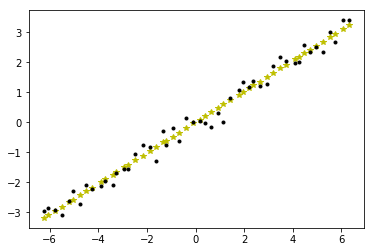

In [163]:
#%% sklearn中的线性模型
# 是scipy.linalg.lstsq的包装
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# 选择更好的基函数，可以取得更好的效果
model.fit(x.reshape(-1, 1),y)
yy1 = model.predict( x.reshape(-1, 1) )
print('LinearRegression均方误差=',np.mean(yy1 - y))
print("LinearRegression的score=",model.score(x.reshape(-1, 1),y))
print('x的奇异值',model.singular_)
print('x的轶',model.rank_)
plt.plot(x,yy1,'y*',label='LinearRegression')
plt.plot(x,y,'k.',label='rawdata')

sklearn.linear_model.LinearRegression求解线性回归方程参数时，首先判断训练集X是不是稀疏矩阵，如是，就用Golub & Kahan双对角线化过程方法来求解；否则就调用C库LAPACK中的用基于分治法的奇异值分解来求解。


In [164]:
# 增加通过不同基函数生成的数据
data = np.concatenate( ( x.reshape(-1,1),
                         (x**2).reshape(-1,1),
                         (x**3).reshape(-1,1),
                         np.sin(x).reshape(-1,1) )
                       ,axis=1 )

LinearRegression均方误差= 1.35447209004e-16
LinearRegression的score= 0.984353293209
x的奇异值 [ 702.35461985   86.34798734   10.47840772    4.32440486]
x的轶 4


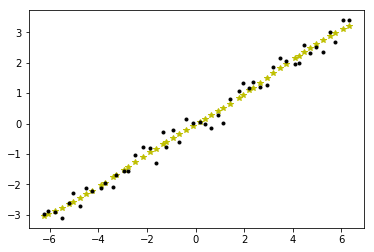

In [165]:
# 选择更好的基函数，可以取得更好的效果
model.fit(data,y)
yy2 = model.predict( data )
print('LinearRegression均方误差=',np.mean(yy2 - y))
print("LinearRegression的score=",model.score(data,y))
print('x的奇异值',model.singular_)
print('x的轶',model.rank_)
plt.plot(x,yy2,'y*',label='LinearRegression')
plt.plot(x,y,'k.',label='rawdata')

LinearRegression均方误差= -4.66293670343e-17
LinearRegression的score= 0.984002022709
x的奇异值 [ 702.35075632   86.34798727   10.45371346]
x的轶 3


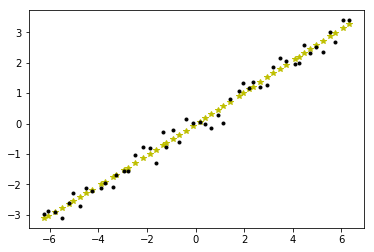

In [166]:
# 选择x,x^2,x^3等三个特征进行学习
datatmp = data[:,[0, 1,2]]
model.fit(datatmp,y)
yy3 = model.predict( datatmp )
print('LinearRegression均方误差=',np.mean(yy3 - y))
print("LinearRegression的score=",model.score(datatmp,y))
print('x的奇异值',model.singular_)
print('x的轶',model.rank_)
plt.plot(x,yy3,'y*',label='LinearRegression')
plt.plot(x,y,'k.',label='rawdata')

LinearRegression均方误差= -1.06581410364e-16
LinearRegression的score= 0.151497299583
x的奇异值 [ 4.96432428]
x的轶 1


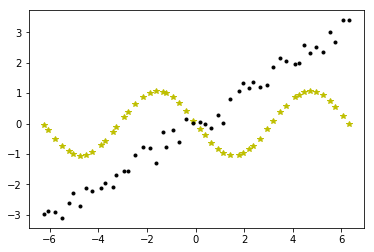

In [167]:
# 选择x,x^2,sin(x)等三个特征进行学习
datatmp = data[:,[3]]
model.fit(datatmp,y)
yy4 = model.predict( datatmp )
print('LinearRegression均方误差=',np.mean(yy4 - y))
print("LinearRegression的score=",model.score(datatmp,y))
print('x的奇异值',model.singular_)
print('x的轶',model.rank_)
plt.plot(x,yy4,'y*',label='LinearRegression')
plt.plot(x,y,'k.',label='rawdata')

LinearRegression均方误差= -7.54951656745e-17
LinearRegression的score= 0.98422328599
x的奇异值 [ 86.34799156  26.24185926   4.58464891]
x的轶 3


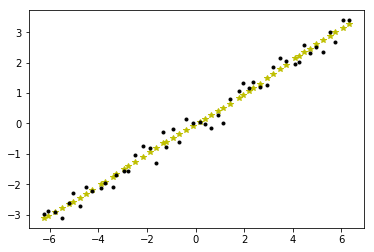

In [168]:
# 选择x,x^2,sin(x)等三个特征进行学习
datatmp = data[:,[0, 1,3]]
model.fit(datatmp,y)
yy5 = model.predict( datatmp )
print('LinearRegression均方误差=',np.mean(yy5 - y))
print("LinearRegression的score=",model.score(datatmp,y))
print('x的奇异值',model.singular_)
print('x的轶',model.rank_)
plt.plot(x,yy5,'y*',label='LinearRegression')
plt.plot(x,y,'k.',label='rawdata')

LinearRegression均方误差= 3.5527136788e-17
LinearRegression的score= 0.81120982618
x的奇异值 [ 26.17269168]
x的轶 1


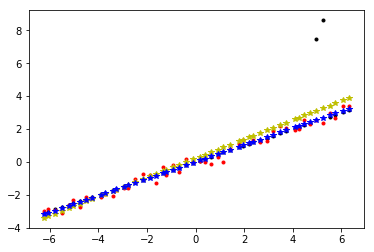

In [177]:
# 添加3个离异点
data = np.concatenate( ( x.reshape(-1,1),
                         (x**2).reshape(-1,1),
                         (x**3).reshape(-1,1),
                         np.sin(x).reshape(-1,1) )
                       ,axis=1 )
outlier_y = f(data[:,0])

outlier_y[44] +=5

outlier_y[45] +=6

# 观察数据    
plt.plot(data[:,0],outlier_y,'k.',label='rawdata')
# 选择x^1
datatmp = data[:,[0]]
model.fit(datatmp,outlier_y)
yy6 = model.predict( datatmp )
print('LinearRegression均方误差=',np.mean(yy6 - outlier_y))
print("LinearRegression的score=",model.score(datatmp,outlier_y))
print('x的奇异值',model.singular_)
print('x的轶',model.rank_)
plt.plot(datatmp,y,'r.',label='rawdata')
plt.plot(datatmp,yy6,'y*',label='LinearRegression')
plt.plot(datatmp,yy1,'b*',label='LinearRegression')

Ridge均方误差= 4.4408920985e-17
Ridge的score= 0.811209826007


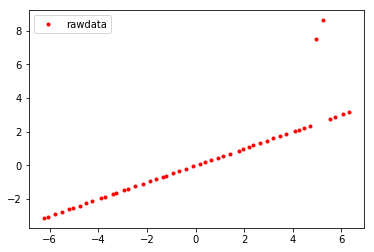

In [176]:
# 使用岭回归
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(data[:,0].reshape(-1, 1),outlier_y)
ridge_yy = ridge_model.predict( data[:,0].reshape(-1, 1))
print('Ridge均方误差=',np.mean(ridge_yy - outlier_y))
print("Ridge的score=",ridge_model.score(data[:,0].reshape(-1, 1),outlier_y))
plt.plot(datatmp,outlier_y,'r.',label='rawdata')
#plt.plot(x,ridge_yy,'m1',label='Ridge')
#plt.plot(datatmp,yy1,'b^',label='LinearRegression')
#plt.plot(datatmp,yy6,'y*',label='LinearRegression')
plt.legend(loc='best')